<a href="https://colab.research.google.com/github/aragornchunletia/Mixtape/blob/main/OLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [2]:
np.random.seed(42)
X = np.random.normal(loc=0, scale=1, size=10000,)
u = np.random.normal(loc=0, scale=1, size=10000)
y = 5.5*X + 12*u

In [3]:
ols = LinearRegression()
ols.fit(X.reshape(-1,1), y)
print(f"Coef: {ols.coef_[0]:.2f}, Intercept: {ols.intercept_:.2f}")

Coef: 5.40, Intercept: 0.16


In [17]:
y_hat = ols.predict(X.reshape(-1,1))

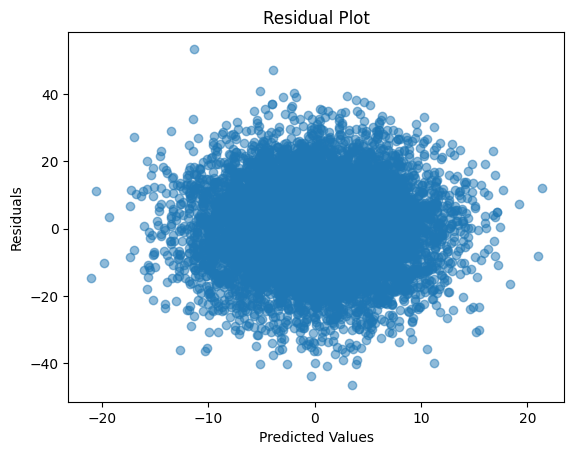

In [18]:
residuals = y - y_hat
plt.scatter( y_hat, residuals,alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [13]:
round(sum(residuals),4)


-0.0

 This is mechanical—least squares pro-
duces residuals which are uncorrelated with fitted values. There’s no
magic here, just least squares
Algebraic Properties of OLS.
When an intercept is included, we have:
The OLS residual always adds up to zero, by construction

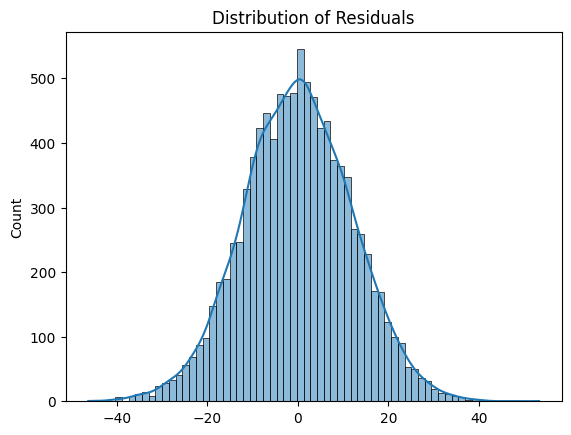

In [7]:
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()

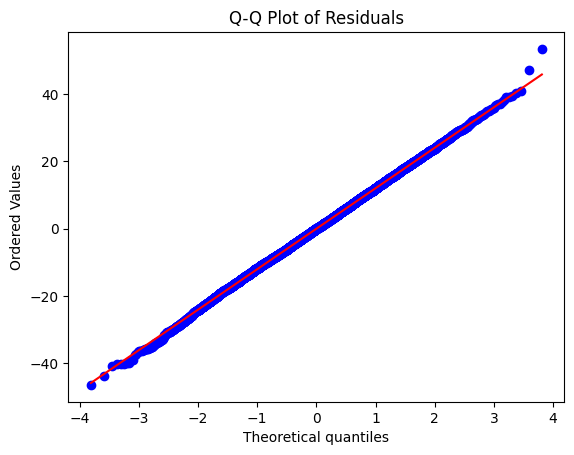

In [8]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

In [19]:
SST = sum((y - np.mean(y))**2)
SSE = sum(residuals**2)
SSR = sum((y_hat - np.mean(y))**2)

In [22]:
"""
Theoretically, SST = SSR + SSE
But in practice, SST ~ SSR + SSE, beacause of floating point precisions
R_squared = SSR / SST or 1-SSR/SSR
"""
np.isclose(SST, SSR + SSE)

True

In [24]:
print(f"R_squared -> {round(1 - (SSR/SST),4)}")

R_squared -> 0.831


0 <= R_squared <= 1 , 0 means not corealted , 1 means perfect linear relationship.
R_squared is a summary that provides us with an information of the captured variance by the explantory variables.
**R_squared is irrelavant for causal inference**

ASSUMPTIONS FOR OLS TO BE UNBIASED

* Linear parameters
  $$ y = \beta_0 + \beta_1x+u$$
   beta_0 annd beta_1 are **Population parameters**
   X and u are **Random variables**

* Random Samplin of size n$$
 \quad \{(x_i, y_i) : i = 1, \dots, n\}
$$

* Sample variation in the explanatory variable
$$V[X] \neq 0 $$

* Zero conditional mean  

  In the population, the error term has zero mean given any value of the explanatory
  variable:$$
  E(u | x) = E(u) = 0$$

*







In [27]:
#Lets test the above with a simulation

x = np.random.normal(0.0, 1, 10000)
u = np.random.normal(0.0, 1, 10000)
y = 3 + 2*x + u
df = pd.DataFrame({'x': x,'u':u, 'y': y})
df.head()



,x,u,y
0,-1.490083,1.024162,1.043997
1,-0.654184,0.694136,2.385767
2,-1.999088,-1.179325,-2.177500
3,1.558627,-0.371712,5.745541
4,-0.231549,0.076376,2.613277


In [28]:
samples = [df.sample(n=100, replace=True) for _ in range(1000)]
coefs = [LinearRegression().fit(sample[['x']], sample['y']).coef_[0] for sample in samples]
intercepts = [LinearRegression().fit(sample[['x']], sample['y']).intercept_ for sample in samples]

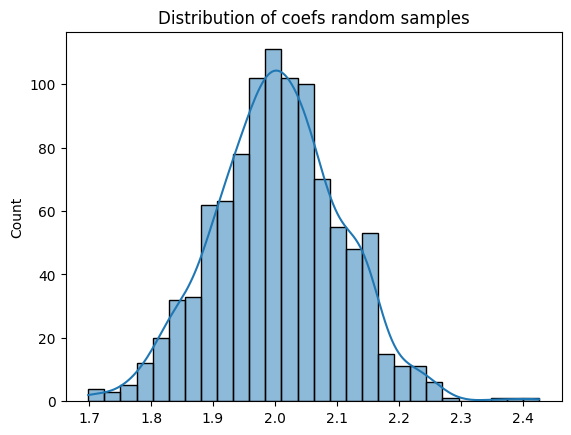

In [35]:
sns.histplot(coefs , kde = True)
plt.title("Distribution of coefs random samples")
plt.show()

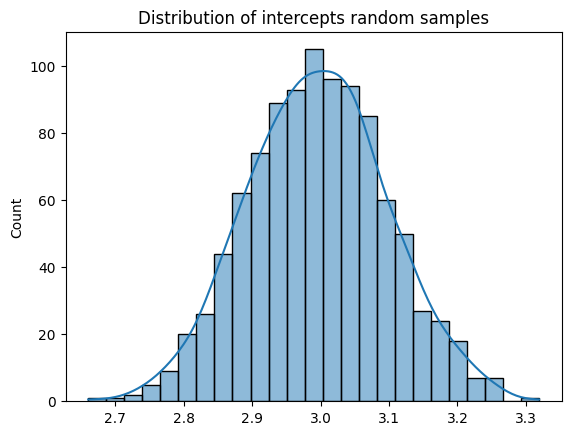

In [36]:
sns.histplot(intercepts , kde = True)
plt.title("Distribution of intercepts random samples")
plt.show()

In [33]:
print(f"actual intercept -> {3} mean of intercepts from samples {round(np.mean(intercepts),4)}")
print(f"actual coef -> {2} mean of coefs from samples {round(np.mean(coefs),4)}")

actual intercept -> 3 mean of intercepts from samples 2.9957
actual coef -> 2 mean of coefs from samples 2.0053
